# Завдання 

### 1)Завантажте файли DataMeters.csv та Prices.csv на локальний комп’ютер 

### 2)Завантажте їх у jupyter notebook як DataFame 

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data_meters = pd.read_csv("DataMeters.csv", delimiter = ";")
prices = pd.read_csv("Prices.csv", delimiter = ";")

prices

,date,upto100,more,gas
0,01.01.2017,0.714,1.29,6.8790
1,01.02.2017,NaN,NaN,NaN
2,01.03.2017,0.900,1.68,NaN
3,01.04.2017,0.900,1.68,6.9579
4,01.05.2017,NaN,NaN,6.9579
5,01.06.2017,NaN,NaN,NaN
6,01.07.2017,NaN,NaN,NaN
7,01.08.2017,NaN,NaN,NaN
8,01.09.2017,NaN,NaN,NaN
9,01.10.2017,NaN,NaN,NaN


In [2]:
data_meters

,user_id,date,e_meter,g_meter,town,street,name
0,200125,01.01.2017,1719,163,Lviv,Street_5,Name_1
1,200126,01.01.2017,3048,179,Lviv,Street_9,Name_2
2,200127,01.01.2017,3402,180,Lviv,Street_10,Name_3
3,200128,01.01.2017,1256,140,Stryi,Street_5,Name_4
4,200129,01.01.2017,1873,165,Gorodok,Street_8,Name_5
...,...,...,...,...,...,...,...
983,200196,01.01.2018,5029,249,Lviv,Street_6,Name_72
984,200197,01.01.2018,3212,240,Lviv,Street_10,Name_73
985,200198,01.01.2018,6536,243,Lviv,Street_10,Name_74
986,200199,01.01.2018,6790,311,Vynnyky,Street_4,Name_75


### 3)Заповніть пропуски в таблиці Prices значеннями з попередніх (за календарем) клітинок 

In [3]:
pr_indexes = list(prices.index)
pr_columns = list(prices.columns)[1:]


for column in pr_columns:
    for i in pr_indexes:
        if pd.isna(prices[column][i]):
            prices[column][i] = prices[column][i-1]

prices

c:\users\andriy\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,upto100,more,gas
0,01.01.2017,0.714,1.29,6.8790
1,01.02.2017,0.714,1.29,6.8790
2,01.03.2017,0.900,1.68,6.8790
3,01.04.2017,0.900,1.68,6.9579
4,01.05.2017,0.900,1.68,6.9579
5,01.06.2017,0.900,1.68,6.9579
6,01.07.2017,0.900,1.68,6.9579
7,01.08.2017,0.900,1.68,6.9579
8,01.09.2017,0.900,1.68,6.9579
9,01.10.2017,0.900,1.68,6.9579


### 4)Випробуйте різні способи доступу до даних: вибірка, проекція. 

Вибірка:

In [4]:
pr_indexes = list(prices.index)
pr_columns = list(prices.columns)[1:]

print(prices[pr_columns[0]][pr_indexes[0]])
print(prices["date"][5])
print(prices[pr_columns[1]][pr_indexes[1]])
print(prices[pr_columns[2]][pr_indexes[1]])

0.7140000000000001
01.06.2017
1.29
6.879


Проекція:

In [5]:
prices["date"]

0     01.01.2017
1     01.02.2017
2     01.03.2017
3     01.04.2017
4     01.05.2017
5     01.06.2017
6     01.07.2017
7     01.08.2017
8     01.09.2017
9     01.10.2017
10    01.11.2017
11    01.12.2017
12    01.01.2018
Name: date, dtype: object

In [6]:
prices[["date","gas"]]

,date,gas
0,01.01.2017,6.8790
1,01.02.2017,6.8790
2,01.03.2017,6.8790
3,01.04.2017,6.9579
4,01.05.2017,6.9579
5,01.06.2017,6.9579
6,01.07.2017,6.9579
7,01.08.2017,6.9579
8,01.09.2017,6.9579
9,01.10.2017,6.9579


### 5)Впорядкуйте вибрані дані за багаторівневим критерієм.

In [21]:
data_meters.head().sort_values(by = ["user_id","e_meter"])

,user_id,date,e_meter,g_meter,town,street,name
0,200125,01.01.2017,1719,163,Lviv,Street_5,Name_1
1,200126,01.01.2017,3048,179,Lviv,Street_9,Name_2
2,200127,01.01.2017,3402,180,Lviv,Street_10,Name_3
3,200128,01.01.2017,1256,140,Stryi,Street_5,Name_4
4,200129,01.01.2017,1873,165,Gorodok,Street_8,Name_5


### 6)Випробуйте функції агрегації: знайдіть суму, середнє, найбільше та найменше значення. 

Сума по e_meter

In [8]:
data_meters.e_meter.sum()

3896242

Середнє по g_meter

In [9]:
data_meters.g_meter.mean()

211.1153846153846

Найбільше значення по e_meter & g_meter

In [10]:
data_meters.e_meter.max()

7048

In [11]:
data_meters.g_meter.max()

342

Найменше значення по e_meter & g_meter

In [12]:
data_meters.e_meter.min()

1025

In [13]:
data_meters.g_meter.min()

100

### 7)Об’єднайте таблиці 

In [14]:
prices.merge(data_meters.sample(12))

,date,upto100,more,gas,user_id,e_meter,g_meter,town,street,name
0,01.04.2017,0.9,1.68,6.9579,200189,2470,168,Yavoriv,Street_1,Name_65
1,01.04.2017,0.9,1.68,6.9579,200187,3089,226,Yavoriv,Street_5,Name_63
2,01.05.2017,0.9,1.68,6.9579,200194,2314,206,Lviv,Street_5,Name_70
3,01.05.2017,0.9,1.68,6.9579,200128,1860,185,Stryi,Street_5,Name_4
4,01.07.2017,0.9,1.68,6.9579,200191,5953,189,Zhovkva,Street_2,Name_67
5,01.09.2017,0.9,1.68,6.9579,200182,5078,245,Gorodok,Street_8,Name_58
6,01.10.2017,0.9,1.68,6.9579,200187,4061,274,Yavoriv,Street_5,Name_63
7,01.10.2017,0.9,1.68,6.9579,200179,4556,235,Lviv,Street_9,Name_55
8,01.11.2017,0.9,1.68,6.9579,200131,4488,285,Lviv,Street_10,Name_7
9,01.01.2018,0.9,1.68,6.9579,200151,3157,267,Lviv,Street_6,Name_27


### 8)Обчисліть, скільки електрики та скільки газу використали споживачі впродовж року, скільки кожного місяця.

In [24]:
new_prices = prices.merge(data_meters.sample(12))
new_prices

,date,upto100,more,gas,user_id,e_meter,g_meter,town,street,name
0,01.01.2017,0.714,1.29,6.8790,200173,1669,141,Briuhovychi,Street_1,Name_49
1,01.02.2017,0.714,1.29,6.8790,200186,2053,205,Yavoriv,Street_7,Name_62
2,01.03.2017,0.900,1.68,6.8790,200136,4168,146,Lviv,Street_4,Name_12
3,01.06.2017,0.900,1.68,6.9579,200145,5521,205,Gorodok,Street_6,Name_21
4,01.06.2017,0.900,1.68,6.9579,200132,5617,226,Lviv,Street_1,Name_8
5,01.06.2017,0.900,1.68,6.9579,200127,4210,235,Lviv,Street_10,Name_3
6,01.08.2017,0.900,1.68,6.9579,200140,4225,249,Mostyska,Street_8,Name_16
7,01.09.2017,0.900,1.68,6.9579,200179,4345,227,Lviv,Street_9,Name_55
8,01.10.2017,0.900,1.68,6.9579,200178,3961,264,Lviv,Street_8,Name_54
9,01.11.2017,0.900,1.68,6.9579,200159,5884,213,Pustomyty,Street_2,Name_35


b)який тип даних в таблиці зображає дату? якщо str, то як його перетворити на Date? 

In [25]:
new_prices.date = pd.DatetimeIndex(new_prices.date)
print(new_prices["date"])

0    2017-01-01
1    2017-01-02
2    2017-01-03
3    2017-01-06
4    2017-01-06
5    2017-01-06
6    2017-01-08
7    2017-01-09
8    2017-01-10
9    2017-01-11
10   2018-01-01
11   2018-01-01
Name: date, dtype: datetime64[ns]


Кожного місяця:

In [30]:
new_prices.groupby(pd.Grouper(key="date", freq="D")).sum()[["e_meter","g_meter"]]

,e_meter,g_meter
date,,
2017-01-01,1669,141
2017-01-02,2053,205
2017-01-03,4168,146
2017-01-04,0,0
2017-01-05,0,0
...,...,...
2017-12-28,0,0
2017-12-29,0,0
2017-12-30,0,0


Впродовж року:

In [31]:
new_prices.groupby(pd.Grouper(key="date", freq="Y")).sum()[["e_meter","g_meter"]]

,e_meter,g_meter
date,,
2017-12-31,41653,2111
2018-12-31,8040,579


### 9)Порахуйте, скільки коштів повинні заплатити споживачі за електрику, за газ, разом.

За електрику:

### 10)Визначте сумарні витрати газу/електрики кожного місяця

### 11)Визначте споживання газу/електрики вподовж року обраним споживачем

In [47]:
step_1 = new_prices
step_2 = step_1[["date","user_id","g_meter","e_meter"]]
#можна вводити конкретний id користувача з консолі і заносити значення в user_lable
user_lable = 200179
step_2[step_2.user_id == user_lable].groupby(pd.Grouper(key="date", freq="Y")).sum()[["e_meter","g_meter"]]

,e_meter,g_meter
date,,
2017-12-31,4345,227


### 12)Знайдіть споживача, який повинен заплатити найбільше (найменше)

Користувач який має заплатити найбільше:

In [55]:
step_1 = new_prices
step_2 = step_1[["user_id","g_meter","e_meter"]]
step_2["egsum"] = step_2.g_meter + step_2.e_meter
step_3 = step_2[["user_id","egsum"]].max()
step_3

c:\users\andriy\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


user_id    200196
egsum        6097
dtype: int64

Користувач який має заплатити найменше:

In [56]:
step_3 = step_2[["user_id","egsum"]].min()
step_3

user_id    200127
egsum        1810
dtype: int64

### 13)Побудуйте графіки, діаграми споживання газу, електрики

a)наприклад, графіки споживання газу та електрики вказаного користувача

4345.0


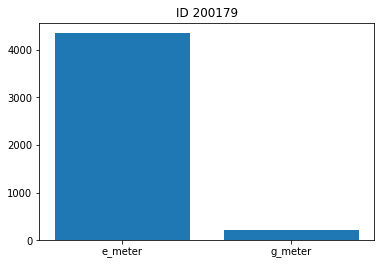

In [82]:
step_1 = new_prices
step_2 = step_1[["date","user_id","g_meter","e_meter"]]
user_lable = 200179
data = [float(step_2[step_2.user_id == user_lable].e_meter), float(step_2[step_2.user_id == user_lable].g_meter)]

x = np.arange(2)
plt.bar(x,data)
plt.xticks(x,["e_meter","g_meter"])
plt.title("ID "+str(user_lable))
plt.show()

b)діаграму витрат по місяцях вказаного користувача

c:\users\andriy\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


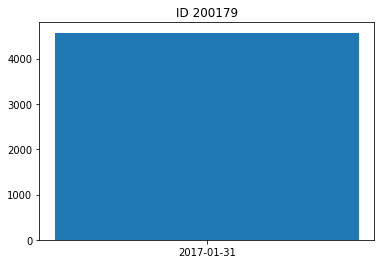

In [94]:
step_1 = new_prices
step_2 = step_1[["date","user_id","g_meter","e_meter"]]
step_2["egsum"] = step_2.g_meter + step_2.e_meter
user_lable = 200179
step_3 = step_2[step_2.user_id == user_lable].groupby(pd.Grouper(key="date", freq="M")).sum()[["egsum"]]
data = []
data.append(step_3.index.strftime("%Y-%m-%d")[0])
costs = float(step_3.egsum)

x = np.arange(1)
plt.bar(x,costs)
plt.xticks(x,data)
plt.title("ID "+str(user_lable))
plt.show()

c)діаграму витрат/споживання за рік по містах